In [1]:
# seperately compute w and b

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# from scipy.misc import derivative

df = pd.read_csv("../data/wdbc.data", header=None,sep = ",")

X_id = df[[0]]
y = np.array(df[[1]])
X_origin = np.array(df.drop([0, 1], axis=1))

X_mean = np.mean(X_origin, axis=0)
X_X_mean = X_origin - X_mean.reshape(1, 30)

X_norm = np.linalg.norm(X_X_mean, axis=1)

X = X_X_mean / X_norm.reshape(569, 1)

# X = np.hstack((np.ones((569,1)),X))
Xy = np.hstack((y, X))

## HB

Average w is :  [ 3.43578587e+00  3.35153032e+01  4.43232362e+01 -8.99247343e+00
  2.00974737e-01  6.79054743e-01  9.93274145e-01  4.35311839e-01
  3.13090192e-01  6.45188790e-02  3.29181851e-01  1.82732320e+00
  3.75604510e+00  3.78069229e+00  2.42818315e-02  1.51777819e-01
  2.19198678e-01  6.65805952e-02  4.64045675e-02  1.26135449e-02
  6.47174926e+00  5.93103294e+01  8.25646019e+01  2.45722714e+01
  4.03502474e-01  2.23256896e+00  2.92922125e+00  9.13244291e-01
  7.99499393e-01  2.57770234e-01] 
Average b is :  -9.432667243982769 
Average error is :  6.64771 
Average n_iters is  10000.0


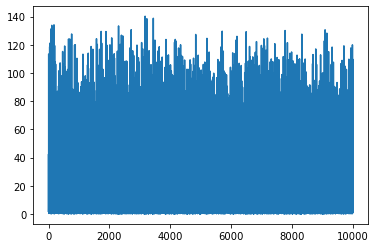

In [3]:
lambd = 0.01
gamma = 0.3  # step size multiplier 0.000001
eta = 0.1
W1 = np.zeros((30, 100))
B1 = np.zeros(100)
Err = np.zeros(100)
n_iters = np.zeros((100, 1))
acc = np.zeros(10000)

for i in range(100):
    # randomly choose trainning set and test set
    np.random.shuffle(Xy)
    Xtrain, Xtest, ytrain, ytest = Xy[:500, 1:], Xy[500:, 1:], Xy[:500, 0], Xy[500:, 0]
    cur_w = np.ones(30) * 10  # The algorithm starts at w0 = 0.5
    cur_b = 10
    prev_w = cur_w
    prev_b = cur_b
    prev_w_step = cur_w - prev_w
    prev_b_step = cur_b - prev_b
    err = np.zeros(10000)
    acc = np.zeros(10000)
    iters = 0  # iteration counter
    while (iters < 10000):
        prev_w = cur_w
        prev_b = cur_b
        a = 1 - (1 / (1 + np.exp(np.dot(Xtrain, prev_w) + np.ones(500) * prev_b)))
        # Derivative of w
        der_w = ((-1) * np.sum(Xtrain * ytrain.reshape(500, 1), axis=0) +
                 np.sum(Xtrain * (np.exp(np.dot(Xtrain, prev_w) + prev_b) / (
                             1 + np.exp(np.dot(Xtrain, prev_w) + prev_b))).reshape(500, 1), axis=0) +
                 lambd * prev_w)
        # Derivative of b
        der_b = ((-1) * np.sum(ytrain) +
                 np.sum((np.exp(np.dot(Xtrain, prev_w) + prev_b)) / (1 + np.exp(np.dot(Xtrain, prev_w) + prev_b))))
        # Objective Function
        f = ((-1) * np.sum(np.dot(Xtrain, prev_w) * ytrain) - np.sum(ytrain * prev_b) +
             np.sum(np.log(1 + np.exp(np.dot(Xtrain, prev_w) + prev_b))) + (lambd / 2) * np.dot(prev_w, prev_w))
        # Accuracy Condition
        b = ((np.linalg.norm(der_w)) ** 2 + der_b ** 2)
        c = ((10 ** (-6)) * (1 + np.abs(f)))
        acc[iters] = b / (1 + np.abs(f))
        if (b <= c):
            break
        cur_w = cur_w - gamma * der_w + eta * prev_w_step
        cur_b = cur_b - gamma * der_b + eta * prev_b_step
        prev_w_step = cur_w - prev_w
        prev_b_step = cur_b - prev_b

        ppred = 1 / (1 + np.exp((-1) * (np.dot(Xtest, cur_w) + cur_b)))
        pmal = ppred > 0.5
        ypred = pmal * np.ones(69)
        err_n = np.count_nonzero(ypred != ytest)
        err[iters] = err_n
        iters += 1
    n_iters[i] = iters
    Err[i] = np.mean(err)
    W1[:, i] = cur_w
    B1[i] = cur_b

plt.plot(acc)
avg_w = W1.mean(axis=1)
avg_b = B1.mean()
avg_err = Err.mean()
avg_iters = n_iters.mean()
print("Average w is : ", avg_w, "\nAverage b is : ", avg_b, "\nAverage error is : ", avg_err, "\nAverage n_iters is ",
      avg_iters)

## NT

Average w is :  [ 3.34366984e+00  3.26416718e+01  4.33416558e+01 -8.11786554e+00
  1.95505275e-01  6.65427021e-01  9.72224383e-01  4.27463137e-01
  3.07416472e-01  6.28290550e-02  3.16778180e-01  1.81294656e+00
  3.76694857e+00  3.56318947e+00  2.38303895e-02  1.47160526e-01
  2.10666623e-01  6.54641254e-02  4.36831596e-02  1.22146366e-02
  6.25994864e+00  5.78977933e+01  8.05236870e+01  2.77258169e+01
  3.95314184e-01  2.18304373e+00  2.85118229e+00  8.93630567e-01
  7.73866332e-01  2.52675394e-01] 
Average b is :  -10.645190456542332 
Average error is :  5.7226820000000025 
Average n_iters is  10000.0


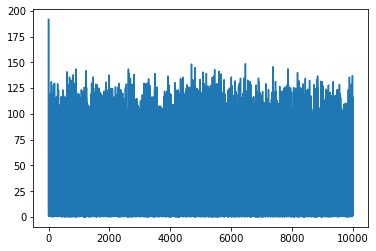

In [4]:
# Nesterov
#  seperately compute w and b

lambd = 0.01
gamma = 0.3  # step size multiplier 0.000001
eta = 0.1
W1 = np.zeros((30, 100))
B1 = np.zeros(100)
Err = np.zeros(100)
n_iters = np.zeros((100, 1))
acc = np.zeros(10000)

for i in range(100):
    # randomly choose trainning set and test set
    np.random.shuffle(Xy)
    Xtrain, Xtest, ytrain, ytest = Xy[:500, 1:], Xy[500:, 1:], Xy[:500, 0], Xy[500:, 0]
    cur_w = np.ones(30) * 10  # The algorithm starts at w0 = 0.5
    cur_b = 10
    prev_w = cur_w
    prev_b = cur_b
    z_w = cur_w
    z_b = cur_b
    prev_w_step = cur_w - prev_w
    prev_b_step = cur_b - prev_b
    err = np.zeros(10000)
    acc = np.zeros(10000)
    iters = 0  # iteration counter
    while (iters < 10000):
        prev_w = cur_w
        prev_b = cur_b
        z_w = prev_w + eta * prev_w_step
        z_b = prev_b + eta * prev_b_step
        a = 1 - (1 / (1 + np.exp(np.dot(Xtrain, prev_w) + np.ones(500) * prev_b)))
        # Derivative of w
        der_w = ((-1) * np.sum(Xtrain * ytrain.reshape(500, 1), axis=0) +
                 np.sum(Xtrain * (
                             np.exp(np.dot(Xtrain, z_w) + prev_b) / (1 + np.exp(np.dot(Xtrain, z_w) + prev_b))).reshape(
                     500, 1), axis=0) +
                 lambd * z_w)
        # Derivative of b
        der_b = ((-1) * np.sum(ytrain) +
                 np.sum((np.exp(np.dot(Xtrain, prev_w) + z_b)) / (1 + np.exp(np.dot(Xtrain, prev_w) + z_b))))
        # Objective Function
        f = ((-1) * np.sum(np.dot(Xtrain, prev_w) * ytrain) - np.sum(ytrain * prev_b) +
             np.sum(np.log(1 + np.exp(np.dot(Xtrain, prev_w) + prev_b))) + (lambd / 2) * np.dot(prev_w, prev_w))
        # Accuracy Condition
        b = ((np.linalg.norm(der_w)) ** 2 + der_b ** 2)
        c = ((10 ** (-6)) * (1 + np.abs(f)))
        acc[iters] = b / (1 + np.abs(f))
        if (b <= c):
            break
        # Gradient with Momentum
        cur_w = z_w - gamma * der_w
        cur_b = z_b - gamma * der_b
        prev_w_step = cur_w - prev_w
        prev_b_step = cur_b - prev_b
        # Determine Probability and Make Prediction
        ppred = 1 / (1 + np.exp((-1) * (np.dot(Xtest, cur_w) + cur_b)))
        pmal = ppred > 0.5
        ypred = pmal * np.ones(69)
        err_n = np.count_nonzero(ypred != ytest)
        err[iters] = err_n
        iters += 1
    n_iters[i] = iters
    Err[i] = np.mean(err)
    W1[:, i] = cur_w
    B1[i] = cur_b

plt.plot(acc)
avg_w = W1.mean(axis=1)
avg_b = B1.mean()
avg_err = Err.mean()
avg_iters = n_iters.mean()
print("Average w is : ", avg_w, "\nAverage b is : ", avg_b, "\nAverage error is : ", avg_err, "\nAverage n_iters is ",
      avg_iters)

Average w is :  [ 0.6198573   4.26011612  3.1651178  -1.77805472  0.48751953  0.5271272
  0.54652654  0.50295087  0.49675196  0.48074539  0.49742009  0.75886021
  0.86170102  1.51229865  0.47708122  0.49029459  0.49354268  0.48009863
  0.47904179  0.47687322  0.78965818  6.86401465  6.38192658  4.18112144
  0.50039637  0.65710307  0.69568574  0.53682074  0.52916297  0.49545764] 
 Average error is :  4.55


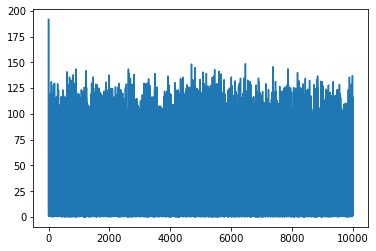

In [7]:
# initialize w0, step size multiplier, step size
# 3(c)
lambd = 0.01
gamma = 0.01 # step size multiplier 0.000001
max_iters = 10000 # maximum number of iterations
W1 = np.zeros((30,100))
B1 = np.zeros(100)
Err = np.zeros(100)
acc = np.zeros(10000)
#
for i in range(100):
    np.random.shuffle(Xy)
    Xtrain, Xtest, ytrain, ytest = Xy[:500,1:], Xy[500:,1:], Xy[:500,0], Xy[500:,0]
    cur_w = np.ones(30)*0.5 # The algorithm starts at w0 = 0.5
    cur_b = 1
    prev_w = cur_w
    prev_b = cur_b
    previous_step_size = 1  #0.01
    iters = 0 #iteration counter
    while (iters < 500):
        prev_w = cur_w
        prev_b = cur_b
        a = 1 - 1/(1+np.exp(np.dot(Xtrain,prev_w)+np.ones(500)*prev_b))
        der_w = np.sum(Xtrain*(-1)*(ytrain.reshape(500,1)),axis=0) + np.sum(Xtrain*(a.reshape(500,1)),axis=0) + lambd*prev_w
        der_b = np.sum(ytrain*(-1)) + np.sum(a)
        cur_w -= gamma * der_w
        cur_b -= gamma * der_b
        previous_step_size = abs(cur_w - prev_w)
        #print('iters:',iters," prev_w:",cur_w, " der:", der, "previous_step_size: ",previous_step_size)
        iters+=1
    W1[:,i] = cur_w
    B1[i]= cur_b
    fPred = np.dot(Xtest,cur_w)
    pPred = 1/(1+np.exp((-1)*fPred))
    label = pPred > 0.5
    yPred = label * np.ones(69)
    Err[i] = np.count_nonzero(yPred != ytest)
    
avg_w = W1.mean(axis = 1)
avg_err = Err.mean()
print("Average w is : ", avg_w, "\n Average error is : ", avg_err)
plt.plot(acc)